# Script for Plotting
Updated on August 24, 2021.

This script is used to plot the results of the experiment. All the data used for the plotting is derived from the real experimental results stored in CSV files.

## Experiment for Subtask A

### Round 1: Grid Search
***Presentation: Highest Accuracy Matrix (5 epochs)***  

This section is used to present the experiment result of grid search on 4 different pretrained models (Bert-Base-Uncased, Distilbert-Base-Uncased, Roberta-Base and Roberta-Large). Since this is the first round of exploration, only 5 epochs are set to quickly locate a good range of learning rate and batch size. **After this round of grid search, the model and the hyperparameters with the highest accuracy will be chosen as the baseline for subsequent experiments.**  

**Original Grid Search Settings are:**  
Model: Bert-Base-Uncased, Distilbert-Base-Uncased, Roberta-Base  
Learning rate list: [1e-2,1e-3,1e-4,1e-5,1e-6,1e-7]  
Batch size list: [8,16,32,64,128,256]  
Epoch: 5

**Further experiment on Roberta-Large:**  
Compared with the performance of Bert-Base-Uncased model, Distilbert-Base-Uncased model and Roberta-Base model, the accuracy of Roberta-base model is the highest. So I did a further experiment on the Roberta-Large model. Since the Roberta-Large model is a fairly Large model, I narrowed down the range of grid search. The Hyperparameters Settings are as follows,  

Model: Roberta-Large  
Learning rate list: [1e-3,1e-4,1e-5,1e-6,1e-7]   
Batch size list: [8,16,32,64,128]  
Epoch: 5

**Conclution:**  
According to the 4 accuracy matrices, Roberta-Large model got the highest accuracy (0.95), with a learning rate of 1e-5 and a batch size of 128. Therefore, this model and hyperparameters were used as the baseline for subsequent experiments.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def plot_accuracy_matrix(accuracy_matrix, model_name, xticks=None, yticks=None):
    plt.figure(figsize=(20, 6.5))
    plt.imshow(accuracy_matrix.transpose(),cmap='Blues')
    plt.tight_layout()
    
    for i in range(accuracy_matrix.shape[0]):
        for j in range(accuracy_matrix.shape[1]):
            plt.text(i, j, '%s' % round(accuracy_matrix[i,j],2), ha='center', va= 'center',fontsize=14,  color = "gray")

    plt.xlabel('Learning Rate',fontdict={'weight': 'normal', 'size': 15})
    plt.ylabel('Batch Size',fontdict={'weight': 'normal', 'size': 15})
    if len(accuracy_matrix) == 6:
        plt.xticks(list(range(6)),[1e-2,1e-3,1e-4,1e-5,1e-6,1e-7])
        plt.yticks(list(range(6)),[8,16,32,64,128,256])
    if len(accuracy_matrix) == 5:
        plt.xticks(list(range(5)),[1e-3,1e-4,1e-5,1e-6,1e-7])
        plt.yticks(list(range(5)),[8,16,32,64,128])
    plt.title("Highest Accuracy Matrix (5 epochs)\n%s" % model_name,fontdict={'weight': 'normal', 'size': 18})
    plt.show()

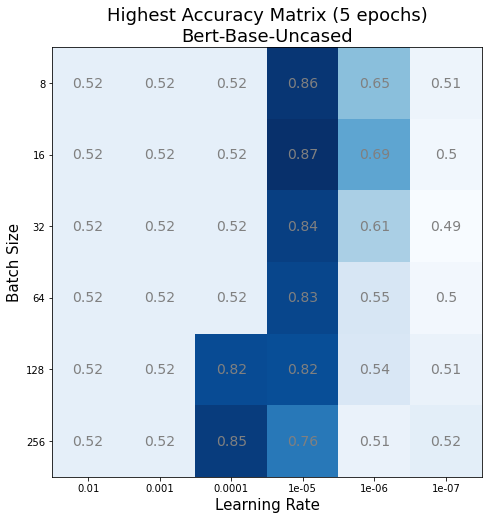

In [2]:
# Bert-Base-Uncased
data_path = "./ExperimentResult_A/20210823_1250_Bert-Base-Uncased_Adam_CrossEntropy/20210823_1250_Bert-Base-Uncased_Adam_CrossEntropy.csv"
data = pd.read_csv(data_path, header=0)
accuracy_matrix = np.array(data["Highest Accuracy"]).reshape(6,6)

plot_accuracy_matrix(accuracy_matrix, "Bert-Base-Uncased")

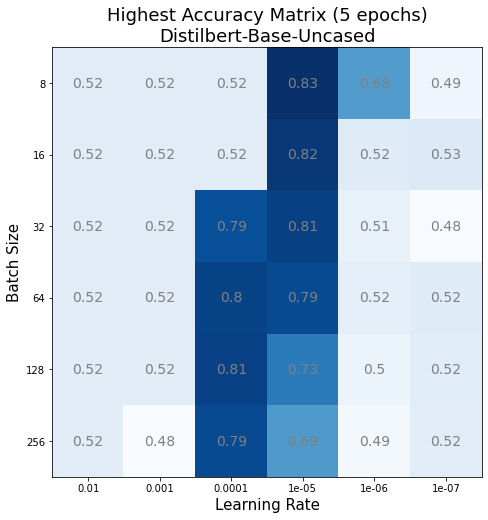

In [3]:
# Distilbert-Base-Uncased
data_path = "./ExperimentResult_A/20210823_1250_Distilbert-Base-Uncased_Adam_CrossEntropy/20210823_1250_Distilbert-Base-Uncased_Adam_CrossEntropy.csv"
data = pd.read_csv(data_path, header=0)
accuracy_matrix = np.array(data["Highest Accuracy"]).reshape(6,6)

plot_accuracy_matrix(accuracy_matrix, "Distilbert-Base-Uncased")

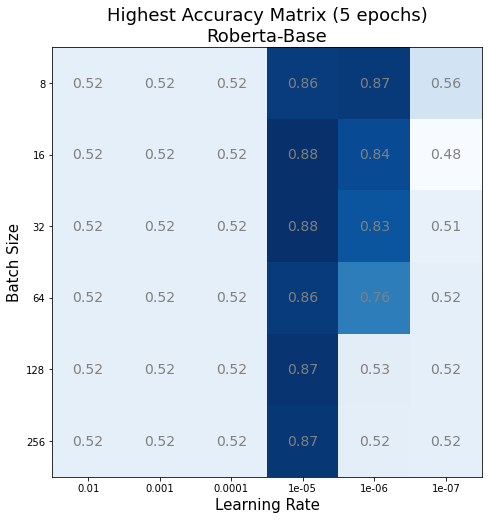

In [4]:
# Roberta-Base
data_path = "./ExperimentResult_A/20210824_0553_Roberta-Base_Adam_CrossEntropy/20210824_0553_Roberta-Base_Adam_CrossEntropy.csv"
data = pd.read_csv(data_path, header=0)
accuracy_matrix = np.array(data["Highest Accuracy"]).reshape(6,6)

plot_accuracy_matrix(accuracy_matrix, "Roberta-Base")

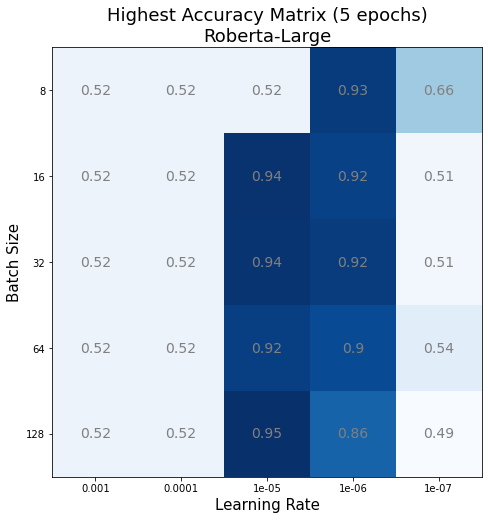

In [5]:
# Roberta-Large
data_path = "./ExperimentResult_A/20210824_0708_Roberta-Large_Adam_CrossEntropy/20210824_0708_Roberta-Large_Adam_CrossEntropy.csv"
data = pd.read_csv(data_path, header=0)
accuracy_matrix = np.array(data["Highest Accuracy"]).reshape(5,5)

plot_accuracy_matrix(accuracy_matrix, "Roberta-Large")